# Chapter 1: Problem 1.4 from "Learning from Data, A Short Course"

### In exercise 1.4, we use an artificial data set to study the percentron learning algorithm. This problem leads you to explore the algorithm further with data sets of different sizes and dimensions.

##### First we need to import our Plots library to be used throughout our Jupyter notebook.

In [1]:
using Plots

### Question a: Generate a linearly separable data set of size 20 as indicated in Exercise 1.4. Plot the examples {($x_{n}$ , $y_{n}$)} as well as the target function f on a plane. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot.

***Next, let's generate 20 random tuples to be used for our random point calculation.***

In [2]:
D = rand(20,2);

***Scatter plot to be sure our points are coming out fine***

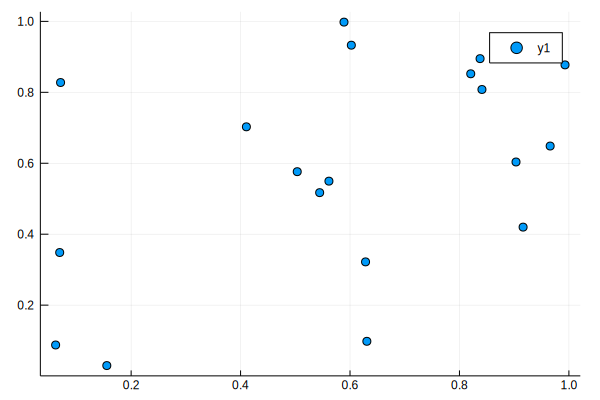

In [3]:
scatter([(D[i,1], D[i,2]) for i = 1:size(D)[1]])

***'y' will be a function of x and our initial slope and intercept will be random values.***

In [4]:
w = rand(2)
y(x) = w[1]*x + w[2]/15 # to scale our intercept to be in the middle

y (generic function with 1 method)

***Adding our line to our plots***

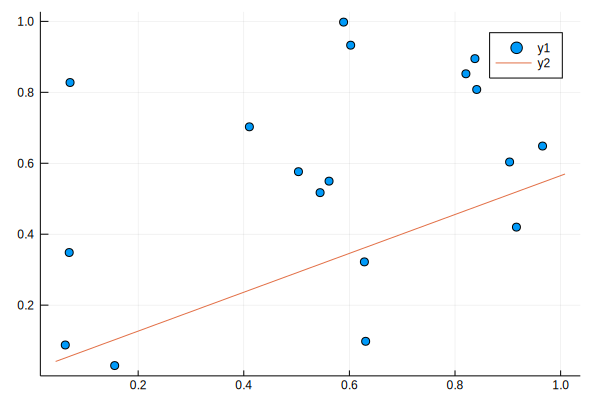

In [5]:
plot!(y)

***Next, we need to differentiate between the points above and below our line. Some 'if' statements will work nicely.***

In [6]:
U = [(D[i,1], D[i,2]) for i = 1:size(D)[1] if y(D[i,1]) < D[i,2]]
L = [(D[i,1], D[i,2]) for i = 1:size(D)[1] if y(D[i,1]) > D[i,2]];

4-element Array{Tuple{Float64,Float64},1}:
 (0.15554199780945166, 0.029628389874239547)
 (0.6283887966474015, 0.3219511427926802)   
 (0.6307762754599684, 0.0980175633798901)   
 (0.916308846055649, 0.4199553069669515)    

***Add that to the plot as well***

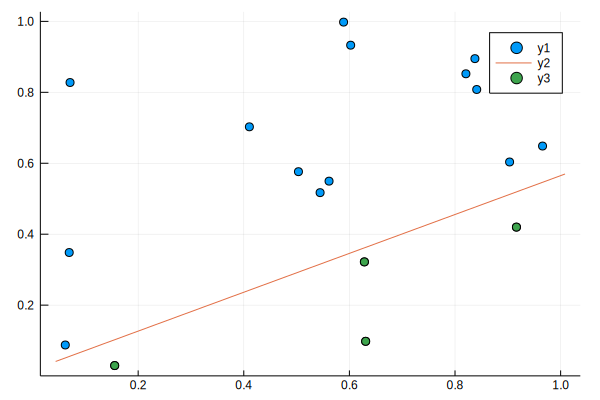

In [7]:
scatter!(L)

***We have a function that creates a linearly separable data set of size n.  The value of $\epsilon$ is our error i.e. the minimum value we want our points to be from our line. This is a compacted version of everything we have seen above.***

In [8]:
function make_random_linearSeparable_data(n, ϵ)
    w = rand(2)
    w[2] = w[2] / 5
    Data = rand(n,2)
    Data = [(Data[i,1], Data[i,2]) for i = 1:n 
            if abs(Data[i, 2] - w[1] * Data[i, 1] - w[2]) > ϵ]
    Y = [Data[i][2] > w[1]* Data[i][1] + w[2] ? 1 : -1 for i = 1:size(Data)[1]]
    
    return Data, Y, w
end

make_random_linearSeparable_data (generic function with 1 method)

In [9]:
D, Y, w = make_random_linearSeparable_data(20, .02);

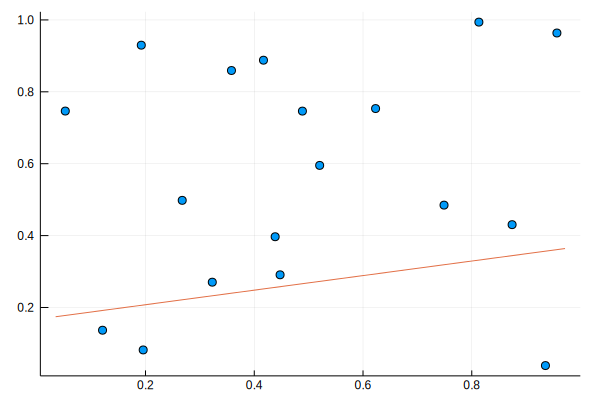

In [10]:
scatter(D, leg = false)
plot!(x -> w[1]*x + w[2])

### Question b: Run the perceptron learning algorithm on the data set above. Report the number of updates that the algorithm takes before converging. Plot the examples {($x_{n}$ $y_{n}$)}, the target function f, and the final hypothesis g in the same figure. Comment on whether f is close to g. 

***Below we have our perceptron learning algorithm. It will take our current best fit line and update the parameters if it is giving the wrong output.***

In [11]:
function perceptron(data, labels,w)
    
    # define hypothesis function
    h(x) = w' * [1.0, x[1], x[2]] < 0 ? -1 : 1
        
    for i = 1:size(data)[1]
        if h(data[i]) != labels[i] 
            w += labels[i]* [1.0, data[i][1], data[i][2]]
        end
    end
    return w
            
end

perceptron (generic function with 1 method)

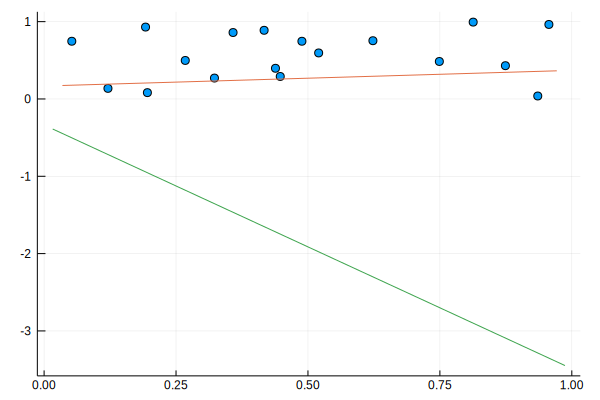

In [12]:
w = rand(3)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_1(x)")

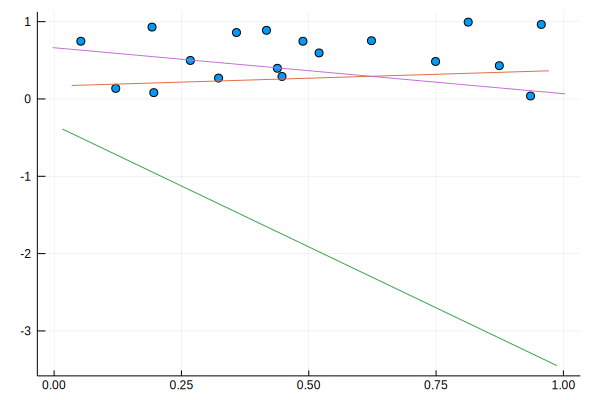

In [13]:
w = perceptron(D, Y, w)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_2(x)")

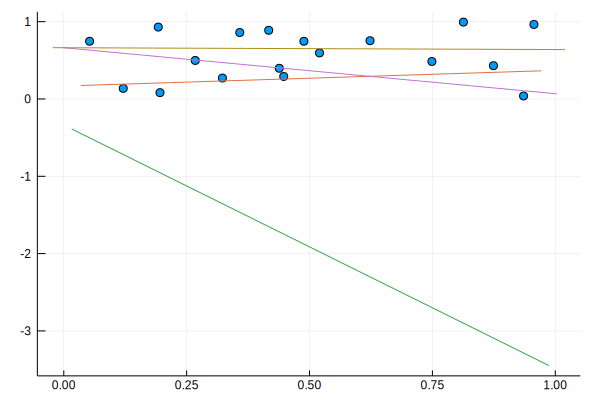

In [14]:
w = perceptron(D, Y, w)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_3(x)")

### Question c: Repeat everything in (b) with another randomly generation data set of size 20. Compare your results with (b).

***Let's call another data set of size 20. Reuse those functions!***

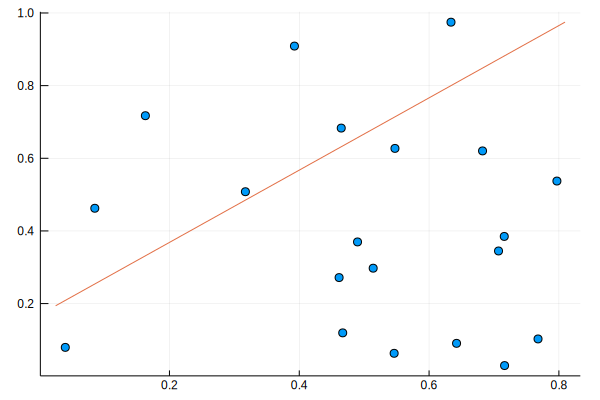

In [15]:
D, Y, w = make_random_linearSeparable_data(20, .02)
scatter(D, leg = false)
plot!(x -> w[1]*x + w[2])

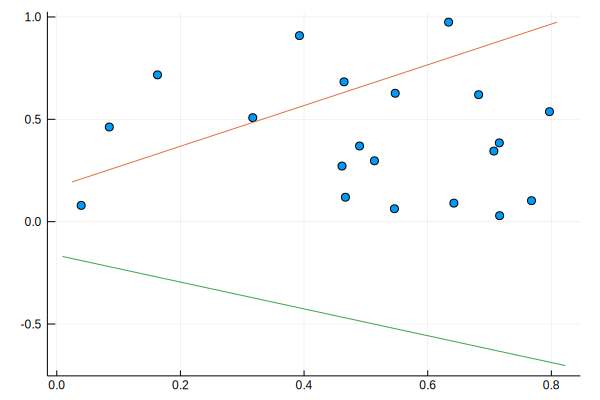

In [16]:
w = rand(3)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_1(x)")

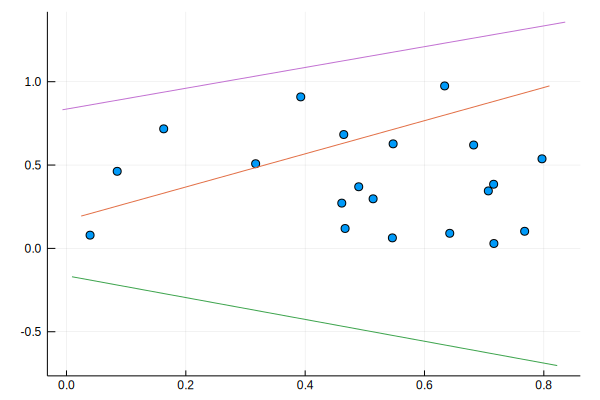

In [17]:
w = perceptron(D, Y, w)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_2(x)")

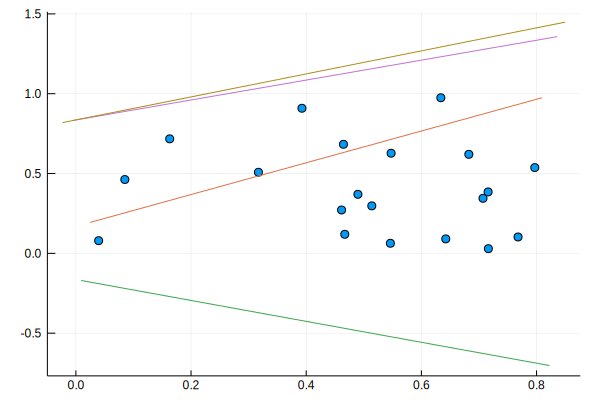

In [18]:
w = perceptron(D, Y, w)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_3(x)")

### Question d: Repeat everything in (b) with another randomly generated data set of size 100. Compare your results with (b).

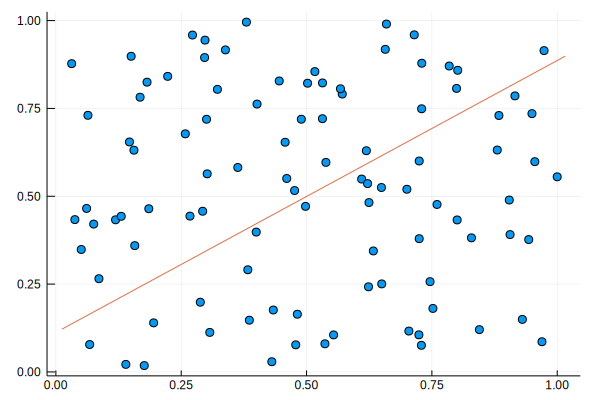

In [19]:
D, Y, w = make_random_linearSeparable_data(100, .02)
scatter(D, leg = false)
plot!(x -> w[1]*x + w[2])

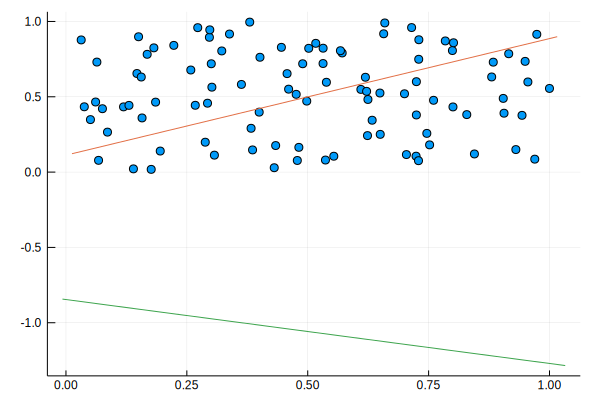

In [20]:
w = rand(3)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_1(x)")

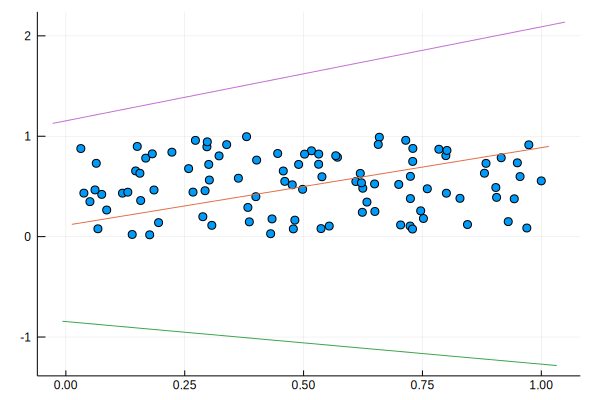

In [21]:
w = perceptron(D, Y, w)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_2(x)")

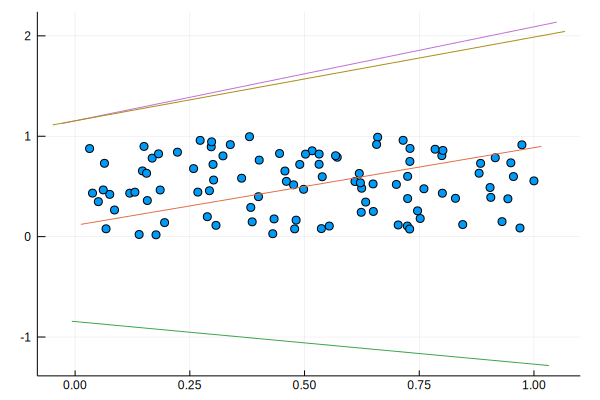

In [22]:
w = perceptron(D, Y, w)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_3(x)")

### Question e: Repeat everything in (b) with another randomly generated data set of size 1000. Compare your results with (b).

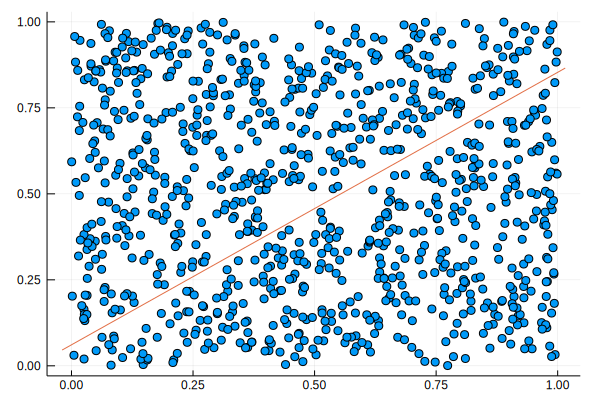

In [23]:
D, Y, w = make_random_linearSeparable_data(1000, .02)
scatter(D, leg = false)
plot!(x -> w[1]*x + w[2])

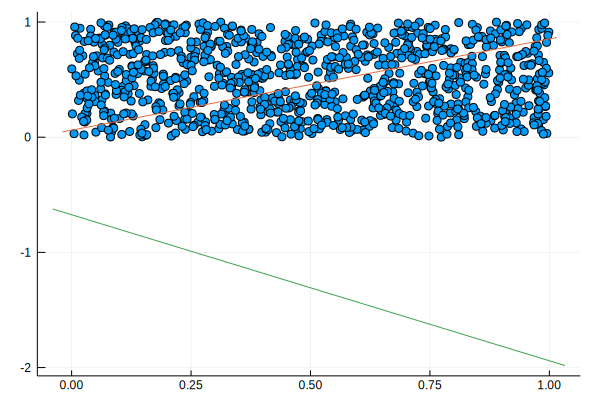

In [24]:
w = rand(3)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_1(x)")

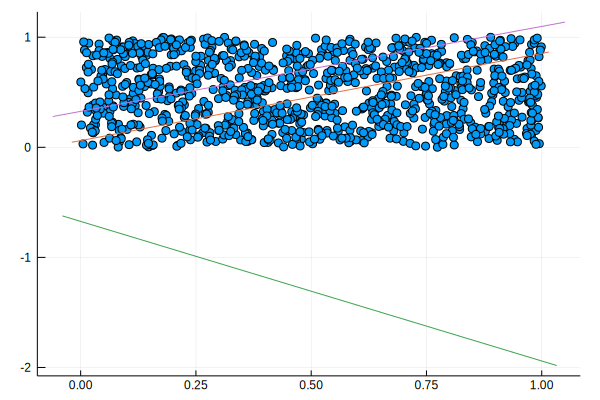

In [25]:
w = perceptron(D, Y, w)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_2(x)")

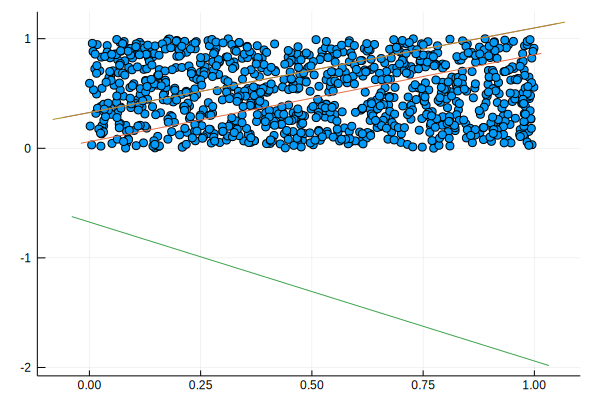

In [26]:
w = perceptron(D, Y, w)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_3(x)")

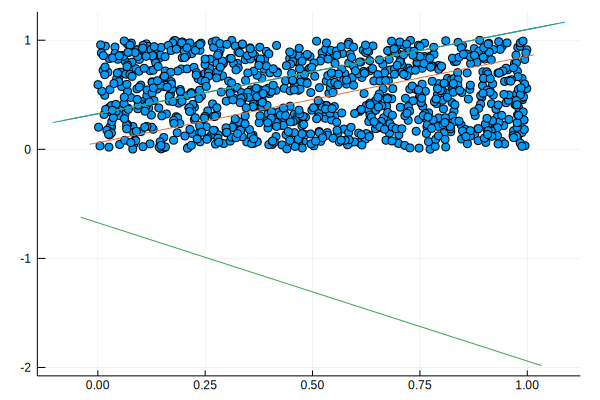

In [27]:
w = perceptron(D, Y, w)
plot!(x-> (-w[1]-w[2]*x/w[3]), label = "h_3(x)")